In [8]:
# line plot of time series
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
import numpy

/home/mani/Anaconda1/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
1981-01-06    15.8
1981-01-07    15.8
1981-01-08    17.4
1981-01-09    21.8
1981-01-10    20.0
1981-01-11    16.2
1981-01-12    13.3
1981-01-13    16.7
1981-01-14    21.5
1981-01-15    25.0
1981-01-16    20.7
1981-01-17    20.6
1981-01-18    24.8
1981-01-19    17.7
1981-01-20    15.5
Name: TempMin, dtype: float64


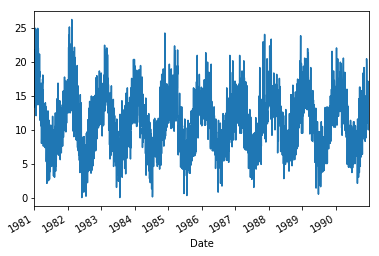

In [3]:

# load dataset
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
# display first few rows
print(series.head(20))
# line plot of dataset
series.plot()
pyplot.show()

In [4]:
split_point = len(series) - 7
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 3643, Validation 7


In [13]:
series.values

array([ 20.7,  17.9,  18.8, ...,  13.5,  15.7,  13. ])

In [14]:
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return numpy.array(diff)
 
# load dataset
series = Series.from_csv('dataset.csv', header=None)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3278
Model:                     ARMA(7, 1)   Log Likelihood               -8673.748
Method:                       css-mle   S.D. of innovations              3.411
Date:                Fri, 27 Jul 2018   AIC                          17367.497
Time:                        14:20:29   BIC                          17428.447
Sample:                             0   HQIC                         17389.322
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0132      0.132      0.099      0.921      -0.246       0.273
ar.L1.y        1.1426      0.287      3.977      0.000       0.580       1.706
ar.L2.y       -0.4347      0.154     -2.830      0.0

In [15]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

# Single Day Predict with Forecast()

In [17]:
forecast = model_fit.forecast()[0]
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

Forecast: 14.861651


In [18]:
forecast = model_fit.forecast(steps=7)[0]

In [19]:
forecast

array([-1.53834883, -0.37120599,  0.03134547,  0.0224069 ,  0.02152508,
        0.01553882, -0.02527552])

# Multi Predict With Forecast()

In [20]:
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1

Day 1: 14.861651
Day 2: 15.628794
Day 3: 13.331345
Day 4: 11.722407
Day 5: 10.421525
Day 6: 14.415539
Day 7: 12.674724


# Single Day Predict with Predict()

In [23]:
start_index = len(differenced)
end_index = len(differenced)
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

Forecast: 14.861651


# Multi Day Predict with Predict()

In [22]:
start_index = len(differenced)
end_index = start_index + 6
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	start_index = len(differenced)
end_index = start_index + 6
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
	inverted = inverse_difference(history, yhat, days_in_year)
	print('Day %d: %f' % (day, inverted))
	history.append(inverted)
	day += 1day += 1

Day 1: 14.861651
Day 2: 15.628794
Day 3: 13.331345
Day 4: 11.722407
Day 5: 10.421525
Day 6: 14.415539
Day 7: 12.674724
